In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step-1: Create and connect SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [ ]:
# Step-2: Create 'sales' table
cursor.execute("DROP TABLE IF EXISTS Sales") # Avoid duplicates during reruns
cursor.execute("""
CREATE TABLE Sales (
  product TEXT,
  quantity INTEGER,
  price REAL

)
""")

In [ ]:
# Step 3: Insert sample sales data
sample_data = [
    ('Apples', 30, 0.50),
    ('Bananas', 45, 0.30),
    ('Cherries', 25, 1.00),
    ('Apples', 20, 0.50),
    ('Bananas', 40, 0.30),
    ('Cherries', 30, 1.00),
    ('Dates', 10, 1.50),
    ('Elderberries', 5, 2.00)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [ ]:
# Step 4: Query to compute total quantity and revenue per product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [ ]:
# Step 5: Load results into pandas DataFrame and print
df = pd.read_sql_query(query, conn)
print(df)

        product  total_qty  revenue
0        Apples         50     25.0
1       Bananas         85     25.5
2      Cherries         55     55.0
3         Dates         10     15.0
4  Elderberries          5     10.0


In [ ]:
# Step 6: Close connection
conn.close()

<Figure size 800x500 with 0 Axes>

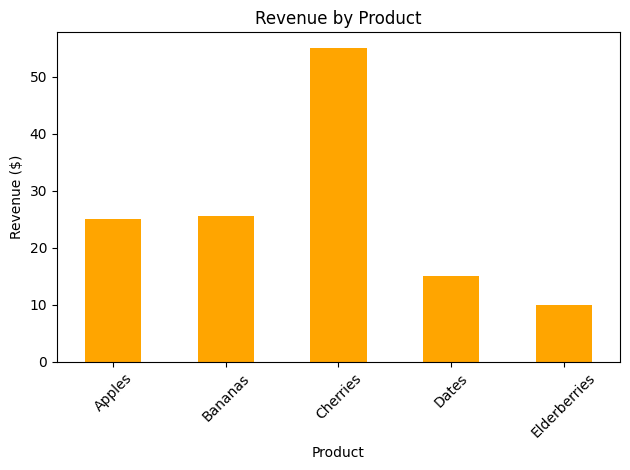

In [ ]:
# Step 7: Plot the revenue bar chart
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')

# Step 8: Add labels and formatting
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()

# Step 9: Save and show the chart
plt.savefig("sales_chart.png")
plt.show()